<a href="https://colab.research.google.com/github/SeonkookHeo/semi-project/blob/main/24_03_26_%ED%97%88%EC%84%A0%EA%B5%AD_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 한글 폰트 설치

In [ ]:
!apt-get -qq -y install fonts-nanum > /dev/null

!rm -rf ~/.cache/matplotlib -rf

> ## 1) 런타임 다시 시작

In [ ]:
import os

os.kill(os.getpid(), 9)

> ## 2) 한글 폰트 설정

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 1. 패션-날씨 데이터

* 드라이브 mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* 패션-날씨 데이터 불러오기

In [ ]:
import pandas as pd

DF = pd.read_csv('/content/drive/MyDrive/5조/03. 데이터/2차 전처리 패션 데이터/Fashion_Weather_Data.csv')

* 패션-날씨 데이터 정보

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565954 entries, 0 to 565953
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Time                  565954 non-null  object 
 1   category_middle_desc  565954 non-null  object 
 2   category_small_desc   565954 non-null  object 
 3   item                  565954 non-null  object 
 4   color                 565954 non-null  object 
 5   material              565954 non-null  object 
 6   sale_price            565954 non-null  int64  
 7   recent_sale_count     565954 non-null  int64  
 8   최고기온                  565954 non-null  float64
 9   최저기온                  565954 non-null  float64
 10  평균기온                  565954 non-null  float64
 11  강수량                   565954 non-null  float64
 12  습도                    565954 non-null  float64
 13  적설                    565954 non-null  float64
 14  체감온도                  565954 non-null  float64
dtype

In [ ]:
DF.head()

,Time,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
0,2023-01-04,원피스,린넨원피스,롱원피스/나시원피스/프릴원피스/러플원피스,베이지,실크/레이온/린넨,36900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
1,2023-01-04,원피스,스퀘어넥원피스,A라인원피스/롱원피스/하객룩원피스/트위드원피스/겨울원피스/스퀘어넥원피스/울원피스,골드/블랙,울/폴리에스터/아크릴,181300,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2,2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,블랙/아이보리,기모/스판/코튼,43200,2,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
3,2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,카키/그레이/블랙/아이보리,아크릴,97000,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
4,2023-01-04,원피스,스퀘어넥원피스,베이식원피스/하객룩원피스/겨울원피스/울원피스,블랙,폴리에스터,52900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36


* 시계열 데이터로 변환

In [ ]:
DF['Time'] = pd.to_datetime(DF['Time'])

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565954 entries, 0 to 565953
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Time                  565954 non-null  datetime64[ns]
 1   category_middle_desc  565954 non-null  object        
 2   category_small_desc   565954 non-null  object        
 3   item                  565954 non-null  object        
 4   color                 565954 non-null  object        
 5   material              565954 non-null  object        
 6   sale_price            565954 non-null  int64         
 7   recent_sale_count     565954 non-null  int64         
 8   최고기온                  565954 non-null  float64       
 9   최저기온                  565954 non-null  float64       
 10  평균기온                  565954 non-null  float64       
 11  강수량                   565954 non-null  float64       
 12  습도                    565954 non-null  float64       
 13 

* 시계열 데이터를 인덱스로

In [ ]:
DF.set_index('Time', inplace=True)

DF.head()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
Time,,,,,,,,,,,,,,
2023-01-04,원피스,린넨원피스,롱원피스/나시원피스/프릴원피스/러플원피스,베이지,실크/레이온/린넨,36900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,A라인원피스/롱원피스/하객룩원피스/트위드원피스/겨울원피스/스퀘어넥원피스/울원피스,골드/블랙,울/폴리에스터/아크릴,181300,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,블랙/아이보리,기모/스판/코튼,43200,2,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,카키/그레이/블랙/아이보리,아크릴,97000,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,베이식원피스/하객룩원피스/겨울원피스/울원피스,블랙,폴리에스터,52900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36


* 23년 1~2월 데이터 추출

In [ ]:
DF_23 = DF['2023-01-01':'2023-02-28']

DF_23.head()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
Time,,,,,,,,,,,,,,
2023-01-04,원피스,린넨원피스,롱원피스/나시원피스/프릴원피스/러플원피스,베이지,실크/레이온/린넨,36900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,A라인원피스/롱원피스/하객룩원피스/트위드원피스/겨울원피스/스퀘어넥원피스/울원피스,골드/블랙,울/폴리에스터/아크릴,181300,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,블랙/아이보리,기모/스판/코튼,43200,2,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,카키/그레이/블랙/아이보리,아크릴,97000,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,베이식원피스/하객룩원피스/겨울원피스/울원피스,블랙,폴리에스터,52900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36


In [ ]:
DF_23.tail()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
Time,,,,,,,,,,,,,,
2023-02-22,스커트,롱스커트,데님롱스커트/데일리스커트/데님스커트/롱스커트/슬릿스커트/캐주얼스커트,블루,코튼,23800,1,12.3,-4.4,2.62,0.0,53.4,0.0,3.24
2023-02-22,스커트,롱스커트,언발스커트/프릴스커트/플리츠스커트/롱스커트/밴딩스커트/플리츠롱스커트,브라운/그린/블랙/베이지/아이보리,폴리에스터,18900,1,12.3,-4.4,2.62,0.0,53.4,0.0,3.24
2023-02-22,스커트,롱스커트,롱스커트/레이스스커트,차콜/그레이/블랙/베이지/아이보리,쉬폰/폴리에스터,20900,1,12.3,-4.4,2.62,0.0,53.4,0.0,3.24
2023-02-22,스커트,롱스커트,데일리스커트/롱스커트/라인스커트/슬릿스커트/H라인스커트/스판스커트,핑크/그린/블랙/퍼플/베이지/아이보리,폴리에스터/스판,29800,1,12.3,-4.4,2.62,0.0,53.4,0.0,3.24
2023-02-22,스커트,플리츠스커트,A라인스커트/테니스스커트/봄스커트/플리츠스커트/미니스커트,블랙/차콜/아이보리,폴리에스터,33000,2,12.3,-4.4,2.62,0.0,53.4,0.0,3.24


* 23년 12월 ~ 24년 1월 데이터 추출

In [ ]:
DF_24 = DF['2023-12-01':'2024-01-31']

DF_24.head()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
Time,,,,,,,,,,,,,,
2023-12-06,원피스,롱원피스,울원피스/데일리원피스/이지룩원피스/롱원피스/배색원피스/체크원피스/밴딩롱원피스/기모원...,블랙/차콜/그레이,폴리에스터/코튼,24900,7,16.8,0.9,9.07,15.6,74.49,0.0,9.08
2023-12-06,원피스,롱원피스,롱원피스,핑크/민트/베이지,폴리에스터/아크릴/나일론,45500,3,16.8,0.9,9.07,15.6,74.49,0.0,9.08
2023-12-06,원피스,롱원피스,데일리원피스/퍼프원피스/캐주얼원피스/볼륨원피스/롱원피스,블랙/카키/그레이/베이지,기모/코튼,69350,1,16.8,0.9,9.07,15.6,74.49,0.0,9.08
2023-12-06,원피스,롱원피스,데일리원피스/골지원피스/슬림원피스/롱원피스/니트원피스/레이어드원피스/하이넥원피스,블랙/베이지,아크릴/코튼,23800,2,16.8,0.9,9.07,15.6,74.49,0.0,9.08
2023-12-06,원피스,롱원피스,코듀로이원피스/뷔스티에원피스,블랙,스판/코듀로이/코튼,55480,1,16.8,0.9,9.07,15.6,74.49,0.0,9.08


In [ ]:
DF_24.tail()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
Time,,,,,,,,,,,,,,
2024-01-31,스커트,롱스커트,A라인스커트/밴딩스커트/핀턱스커트/롱스커트/벨트스커트,화이트/블랙/아이보리/베이지,코튼,29800,3,11.7,-1.2,3.75,4.1,66.8,58.0,4.28
2024-01-31,스커트,롱스커트,빅사이즈스커트/울스커트/겨울스커트,블랙/카키,폴리에스터,23000,1,11.7,-1.2,3.75,4.1,66.8,58.0,4.28
2024-01-31,스커트,롱스커트,A라인스커트/기모스커트/컬러풀스커트/코듀로이스커트/하이웨이스트스커트/H라인스커트/울...,와인/베이지/차콜,코듀로이/코튼,25900,2,11.7,-1.2,3.75,4.1,66.8,58.0,4.28
2024-01-31,스커트,롱스커트,카고스커트/기모스커트/밴딩스커트/겨울스커트/롱스커트,그레이/블랙/그린,폴리에스터/코튼,19800,1,11.7,-1.2,3.75,4.1,66.8,58.0,4.28
2024-01-31,스커트,롱스커트,A라인스커트/데일리스커트/밴딩롱스커트/하객룩스커트/롱스커트,블랙/아이보리/민트,폴리에스터,43000,1,11.7,-1.2,3.75,4.1,66.8,58.0,4.28


* 23년 데이터 전체 추출

In [100]:
DF_23_all = DF['2023-01-01':'2023-12-31']

DF_23_all.head()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
Time,,,,,,,,,,,,,,
2023-01-04,원피스,린넨원피스,롱원피스/나시원피스/프릴원피스/러플원피스,베이지,실크/레이온/린넨,36900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,A라인원피스/롱원피스/하객룩원피스/트위드원피스/겨울원피스/스퀘어넥원피스/울원피스,골드/블랙,울/폴리에스터/아크릴,181300,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,블랙/아이보리,기모/스판/코튼,43200,2,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,카키/그레이/블랙/아이보리,아크릴,97000,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
2023-01-04,원피스,스퀘어넥원피스,베이식원피스/하객룩원피스/겨울원피스/울원피스,블랙,폴리에스터,52900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36


In [101]:
DF_23_all.tail()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
Time,,,,,,,,,,,,,,
2023-12-20,스커트,롱스커트,겨울스커트/데일리스커트/울스커트/플리츠스커트/메탈릭스커트/롱스커트,실버/블랙,스판/폴리에스터,57600,1,7.2,-14.7,-5.53,2.9,64.91,85.5,-5.51
2023-12-20,스커트,플리츠스커트,겨울스커트/울스커트/플리츠스커트/미니스커트/기모스커트,카키/베이지/블랙,기모/코튼,28800,1,7.2,-14.7,-5.53,2.9,64.91,85.5,-5.51
2023-12-20,스커트,플레어스커트,베이식스커트/A라인스커트/울스커트/속바지스커트/A라인치마바지/미니스커트/치마바지/리넨팬츠,레드,폴리에스터/울,51000,2,7.2,-14.7,-5.53,2.9,64.91,85.5,-5.51
2023-12-20,스커트,플레어스커트,하이웨이스트스커트/여름스커트/데님미니스커트/A라인스커트/데님스커트/중청스커트/A라인...,블루,데님/스판,35900,1,7.2,-14.7,-5.53,2.9,64.91,85.5,-5.51
2023-12-20,스커트,롱스커트,롱스커트,베이지/블랙,폴리에스터/코튼,13750,1,7.2,-14.7,-5.53,2.9,64.91,85.5,-5.51


# 23년 날씨-패션 탐색적 데이터 분석

> ## 1) 의류 별 판매량

In [ ]:
DF_23['month'] = DF_23.index.month

DF_23.head()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도,month
Time,,,,,,,,,,,,,,,
2023-01-04,원피스,린넨원피스,롱원피스/나시원피스/프릴원피스/러플원피스,베이지,실크/레이온/린넨,36900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,A라인원피스/롱원피스/하객룩원피스/트위드원피스/겨울원피스/스퀘어넥원피스/울원피스,골드/블랙,울/폴리에스터/아크릴,181300,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,블랙/아이보리,기모/스판/코튼,43200,2,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,스퀘어넥원피스,카키/그레이/블랙/아이보리,아크릴,97000,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,베이식원피스/하객룩원피스/겨울원피스/울원피스,블랙,폴리에스터,52900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1


In [98]:
fashion_sale_counts_23 = pd.pivot_table(DF_23,
                                        index = ['category_middle_desc'],
                                        values = ['recent_sale_count'],
                                        columns = ['month'],
                                        aggfunc = 'sum',
                                        fill_value = 0)
fashion_sale_counts_23.sort_values(by=fashion_sale_counts_23.columns[0],
                                   ascending=False,
                                   inplace=True)
fashion_sale_counts_23

recent_sale_count       
month                                1      2
category_middle_desc                         
상의                               48367  63207
아우터                              15106  23784
원피스                              10951  14223
팬츠                               10259  12154
스커트                               9126  12598

<Figure size 2000x1000 with 0 Axes>

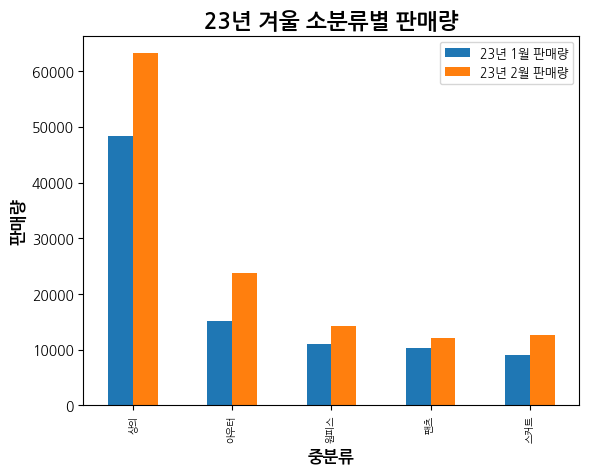

In [99]:
import seaborn as sns

plt.figure(figsize = (20, 10))
fashion_sale_counts_23.plot(kind='bar')
plt.title('23년 겨울 소분류별 판매량', fontsize = 16, fontweight='bold')
plt.xlabel('중분류', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량', fontsize = 12, fontweight = 'bold')
plt.legend(['23년 1월 판매량', '23년 2월 판매량'], fontsize = 9)
plt.xticks(fontsize=7)
plt.show()

> ## 2) 의류 별 키워드

In [ ]:
DF_23['item'] = DF_23['item'] + ','

DF_23.head()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도,month
Time,,,,,,,,,,,,,,,
2023-01-04,원피스,린넨원피스,"롱원피스/나시원피스/프릴원피스/러플원피스,",베이지,실크/레이온/린넨,36900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,"A라인원피스/롱원피스/하객룩원피스/트위드원피스/겨울원피스/스퀘어넥원피스/울원피스,",골드/블랙,울/폴리에스터/아크릴,181300,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,"스퀘어넥원피스,",블랙/아이보리,기모/스판/코튼,43200,2,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,"스퀘어넥원피스,",카키/그레이/블랙/아이보리,아크릴,97000,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,"베이식원피스/하객룩원피스/겨울원피스/울원피스,",블랙,폴리에스터,52900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1


In [ ]:
DF_23['item'] = DF_23['item'] * DF_23['recent_sale_count']

DF_23.head()

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도,month
Time,,,,,,,,,,,,,,,
2023-01-04,원피스,린넨원피스,"롱원피스/나시원피스/프릴원피스/러플원피스,",베이지,실크/레이온/린넨,36900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,"A라인원피스/롱원피스/하객룩원피스/트위드원피스/겨울원피스/스퀘어넥원피스/울원피스,",골드/블랙,울/폴리에스터/아크릴,181300,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,"스퀘어넥원피스,스퀘어넥원피스,",블랙/아이보리,기모/스판/코튼,43200,2,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,"스퀘어넥원피스,",카키/그레이/블랙/아이보리,아크릴,97000,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1
2023-01-04,원피스,스퀘어넥원피스,"베이식원피스/하객룩원피스/겨울원피스/울원피스,",블랙,폴리에스터,52900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36,1


In [ ]:
item_23 = DF_23['item'].unique().tolist()

item_23 = str(item_23)

In [ ]:
print(item_23[:1000])
print(len(item_23))

['롱원피스/나시원피스/프릴원피스/러플원피스,', 'A라인원피스/롱원피스/하객룩원피스/트위드원피스/겨울원피스/스퀘어넥원피스/울원피스,', '스퀘어넥원피스,스퀘어넥원피스,', '스퀘어넥원피스,', '베이식원피스/하객룩원피스/겨울원피스/울원피스,', '하객룩원피스,', '연말파티원피스/정장원피스,', '롱원피스/나시원피스/빅사이즈원피스/캐주얼원피스/겨울원피스/어깨끈원피스/오버핏원피스/뷔스티에원피스/울원피스,', '88사이즈원피스/빅사이즈원피스/겨울원피스/뷔스티에원피스/울원피스,', '파티룩원피스/볼륨원피스/연말파티원피스/새틴원피스/스퀘어넥원피스/실키원피스/퍼프원피스/셔링원피스,', '볼륨원피스/골지니트/연말파티원피스/니트원피스/슬림니트/슬림니트원피스/슬릿원피스,', '슬림원피스/스퀘어넥원피스/미니원피스/연말파티원피스,', 'A라인원피스/하객룩원피스,', '나시원피스/뷔스티에원피스/리본원피스,나시원피스/뷔스티에원피스/리본원피스,나시원피스/뷔스티에원피스/리본원피스,', '체크원피스/스퀘어넥원피스/카라원피스/단추원피스/미니원피스/패턴원피스,', '겨울원피스/울원피스,겨울원피스/울원피스,', '롱원피스/배색원피스/플로럴원피스,', '롱원피스/머메이드원피스/스퀘어넥원피스/슬릿원피스,', '볼륨원피스/스퀘어넥원피스/니트원피스/퍼프원피스/골지원피스/H라인원피스/미니원피스,', '로맨틱원피스,', '롱원피스/나시원피스/체크원피스/겨울원피스/레이어드원피스/뷔스티에원피스,롱원피스/나시원피스/체크원피스/겨울원피스/레이어드원피스/뷔스티에원피스,', '스퀘어넥원피스/겨울원피스/울원피스/연말파티원피스,', '울원피스,', '겨울원피스/울원피스/연말파티원피스,', '롱원피스/체크원피스/레이어드원피스/뷔스티에원피스/스퀘어넥원피스/슬릿원피스,', '캐주얼원피스,캐주얼원피스,캐주얼원피스,', '하객룩원피스/체크원피스,', '스퀘어넥원피스/퍼프원피스/볼륨원피스,', '베이식원피스/롱원피스/나시원피스/레이어드원피스,', '로맨틱원피스/바캉스룩원피스,', '머메이드원피스/울원피스,', '꽈배기니트/투

In [ ]:
item_23 = item_23.replace("'", ",").replace(" ", ",").replace("/", ",")

In [ ]:
import re
item_23 = re.sub("[\d\\-\.\[\](nan)]", "", item_23)

In [ ]:
item_23 = re.sub(",{2,}", ",", item_23)

In [ ]:
item_23[:1000]

',롱원피스,나시원피스,프릴원피스,러플원피스,A라인원피스,롱원피스,하객룩원피스,트위드원피스,겨울원피스,스퀘어넥원피스,울원피스,스퀘어넥원피스,스퀘어넥원피스,스퀘어넥원피스,베이식원피스,하객룩원피스,겨울원피스,울원피스,하객룩원피스,연말파티원피스,정장원피스,롱원피스,나시원피스,빅사이즈원피스,캐주얼원피스,겨울원피스,어깨끈원피스,오버핏원피스,뷔스티에원피스,울원피스,사이즈원피스,빅사이즈원피스,겨울원피스,뷔스티에원피스,울원피스,파티룩원피스,볼륨원피스,연말파티원피스,새틴원피스,스퀘어넥원피스,실키원피스,퍼프원피스,셔링원피스,볼륨원피스,골지니트,연말파티원피스,니트원피스,슬림니트,슬림니트원피스,슬릿원피스,슬림원피스,스퀘어넥원피스,미니원피스,연말파티원피스,A라인원피스,하객룩원피스,나시원피스,뷔스티에원피스,리본원피스,나시원피스,뷔스티에원피스,리본원피스,나시원피스,뷔스티에원피스,리본원피스,체크원피스,스퀘어넥원피스,카라원피스,단추원피스,미니원피스,패턴원피스,겨울원피스,울원피스,겨울원피스,울원피스,롱원피스,배색원피스,플로럴원피스,롱원피스,머메이드원피스,스퀘어넥원피스,슬릿원피스,볼륨원피스,스퀘어넥원피스,니트원피스,퍼프원피스,골지원피스,H라인원피스,미니원피스,로맨틱원피스,롱원피스,나시원피스,체크원피스,겨울원피스,레이어드원피스,뷔스티에원피스,롱원피스,나시원피스,체크원피스,겨울원피스,레이어드원피스,뷔스티에원피스,스퀘어넥원피스,겨울원피스,울원피스,연말파티원피스,울원피스,겨울원피스,울원피스,연말파티원피스,롱원피스,체크원피스,레이어드원피스,뷔스티에원피스,스퀘어넥원피스,슬릿원피스,캐주얼원피스,캐주얼원피스,캐주얼원피스,하객룩원피스,체크원피스,스퀘어넥원피스,퍼프원피스,볼륨원피스,베이식원피스,롱원피스,나시원피스,레이어드원피스,로맨틱원피스,바캉스룩원피스,머메이드원피스,울원피스,꽈배기니트,투피스세트,니트원피스,꽈배기니트원피스,연말파티원피스,롱원피스,체크원피스,뷔스티에원피스,포인트원피스,베이식원피스,뷔스티에원피스,스퀘어넥원피스,미디원피스,데일리원피스,롱원피스,빅사이즈원피스,캐주얼원피스,오버롤원피스,겨울원피스,울원피

In [ ]:
item_count_23 = pd.Series(item_23.split(',')).value_counts()

In [ ]:
item_count_23

맨투맨            11027
롱스커트            9790
베이식티셔츠          9252
롱원피스            9096
울니트             8612
               ...  
보석스커트              1
코튼트렌치코트            1
하이웨이스트데님스커트        1
치마레깅스              1
프릴치마바지             1
Length: 2735, dtype: int64

In [ ]:
DF_23_item_count = pd.DataFrame(item_count_23)

In [ ]:
DF_23_item_count

,0
맨투맨,11027
롱스커트,9790
베이식티셔츠,9252
롱원피스,9096
울니트,8612
...,...
보석스커트,1
코튼트렌치코트,1
하이웨이스트데님스커트,1
치마레깅스,1


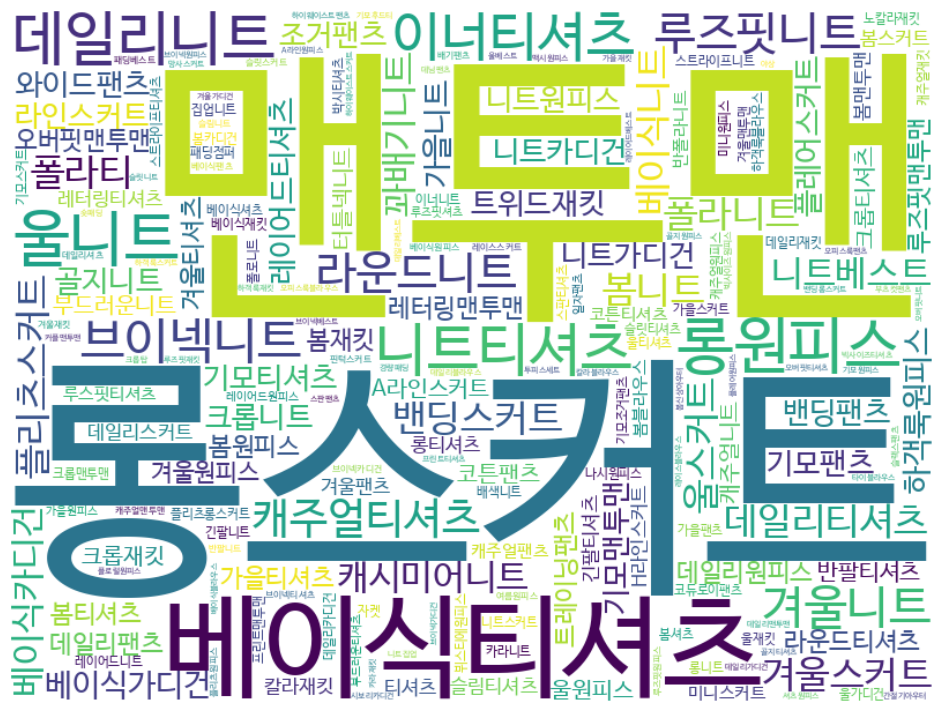

In [ ]:
from wordcloud import WordCloud

korean_font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wc = WordCloud(font_path = korean_font_path,
               background_color = 'white',
               width = 800,
               height = 600)

frequencies = DF_23_item_count[0]

wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize = (14, 9))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

> ## 3) 의류 색상 키워드

In [ ]:
DF_23['color'] = DF_23['color'] + ','

In [ ]:
DF_23['color'] = DF_23['color'] * DF_23['recent_sale_count']

In [ ]:
color_23 = DF_23['color'].unique().tolist()

color_23 = str(color_23)

In [ ]:
color_23 = color_23.replace("'", ",").replace(" ", ",").replace("/", ",")
color_23 = re.sub("[\d\\-\.\[\](nan)]", "", color_23)
color_23 = re.sub(",{2,}", ",", color_23)

In [ ]:
color_count_23 = pd.Series(color_23.split(',')).value_counts()
DF_23_color_count = pd.DataFrame(color_count_23)
DF_23_color_count

,0
블랙,82773
아이보리,62987
베이지,57456
핑크,46023
화이트,38199
그레이,37185
라이트블루,27056
브라운,26240
블루,24004
네이비,23383


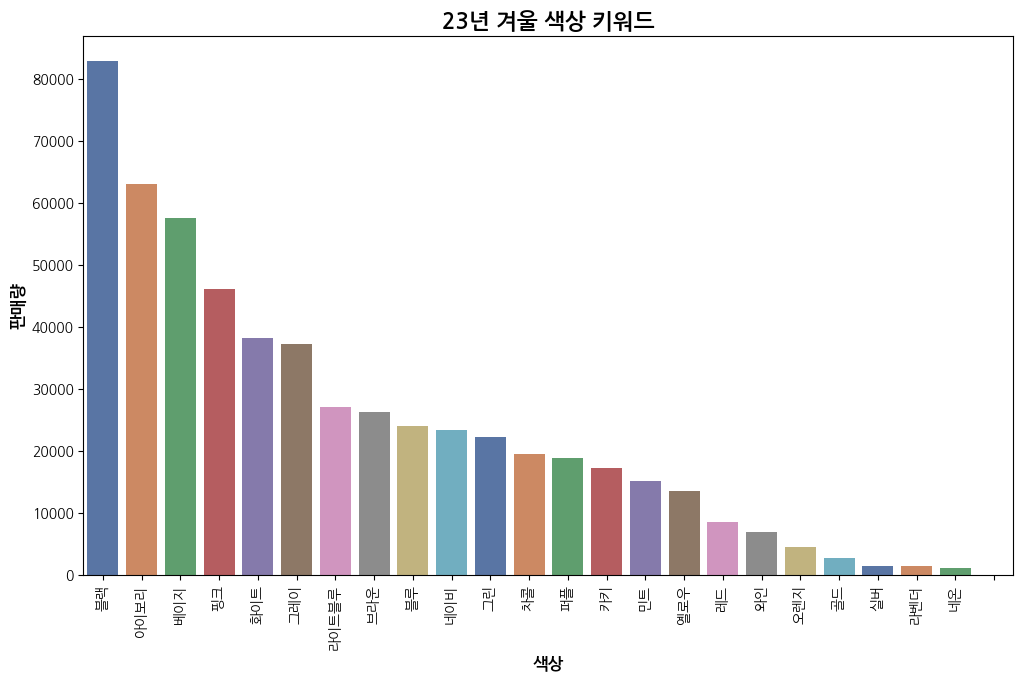

In [ ]:
plt.figure(figsize = (12, 7))
sns.barplot(data=DF_23_color_count,
            x = DF_23_color_count.index,
            y = DF_23_color_count[0],
            palette = 'deep')
plt.title('23년 겨울 색상 키워드', fontsize = 16, fontweight = 'bold')
plt.xlabel('색상', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

> ## 4) 의류 별 재질 키워드

In [ ]:
DF_23['material'] = DF_23['material'] + ','

DF_23['material'] = DF_23['material'] * DF_23['recent_sale_count']

In [ ]:
material_23 = DF_23['material'].unique().tolist()

material_23 = str(material_23)

In [ ]:
material_23 = material_23.replace("'", ",").replace(" ", ",").replace("/", ",")
material_23 = re.sub("[\d\\-\.\[\](nan)]", "", material_23)
material_23 = re.sub(",{2,}", ",", material_23)

In [ ]:
material_count_23 = pd.Series(material_23.split(',')).value_counts()
DF_23_material_count = pd.DataFrame(material_count_23)
DF_23_material_count

,0
폴리에스터,31608
코튼,17803
스판,14842
아크릴,12806
레이온,12204
울,11302
실크,9545
나일론,8219
기모,4545
캐시미어,2496


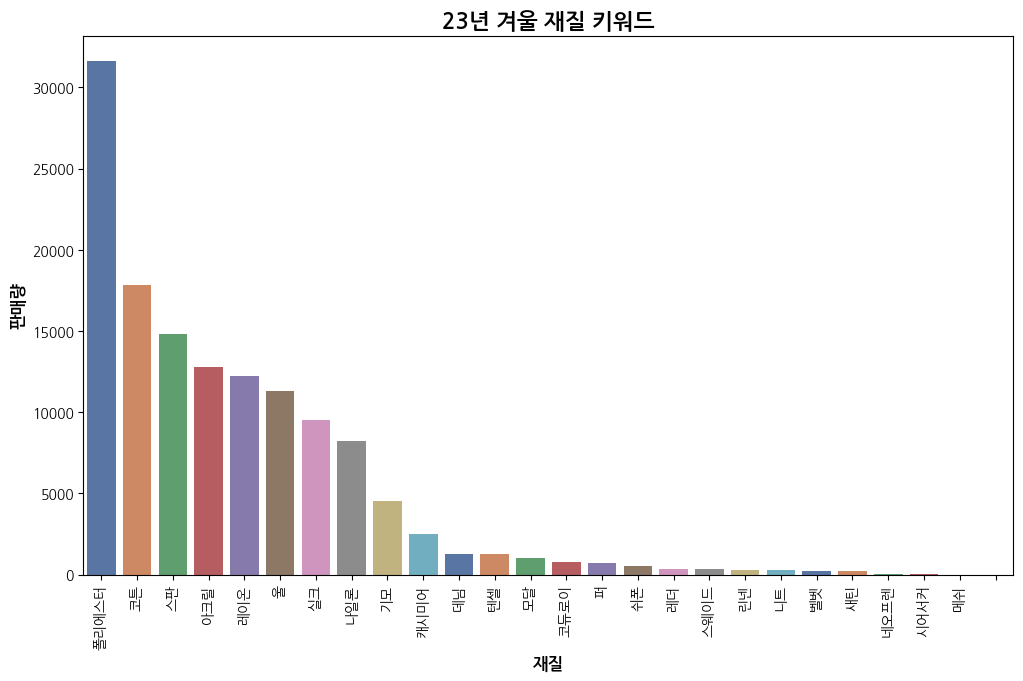

In [ ]:
plt.figure(figsize = (12, 7))
sns.barplot(data=DF_23_material_count,
            x = DF_23_material_count.index,
            y = DF_23_material_count[0],
            palette = 'deep')
plt.title('23년 겨울 재질 키워드', fontsize = 16, fontweight = 'bold')
plt.xlabel('재질', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

# 2023년 전체 데이터

> ## 1)2023년 기온에 따른 패션 소비 트렌드

* 평균기온

In [110]:
DF_23_temperature = pd.pivot_table(DF_23_all,
                                   index = '평균기온',
                                   values = 'recent_sale_count',
                                   columns = 'category_middle_desc',
                                   aggfunc = 'sum',
                                   fill_value = 0)
DF_23_temperature

category_middle_desc,상의,세트/투피스,스커트,아우터,원피스,팬츠
평균기온,,,,,,
-5.53,10716,11,3524,2000,2489,6644
-4.63,6660,0,1444,2327,1433,1165
-0.76,11374,26,3556,2182,2972,7588
0.41,11919,27,3732,2986,2803,8863
0.62,14687,0,2520,4529,3032,3668
0.76,13965,0,2713,4538,3052,2585
2.23,27020,0,5162,8250,6486,5426
2.38,16569,0,3418,6346,3584,2808
2.62,17552,0,3311,6918,3975,4114


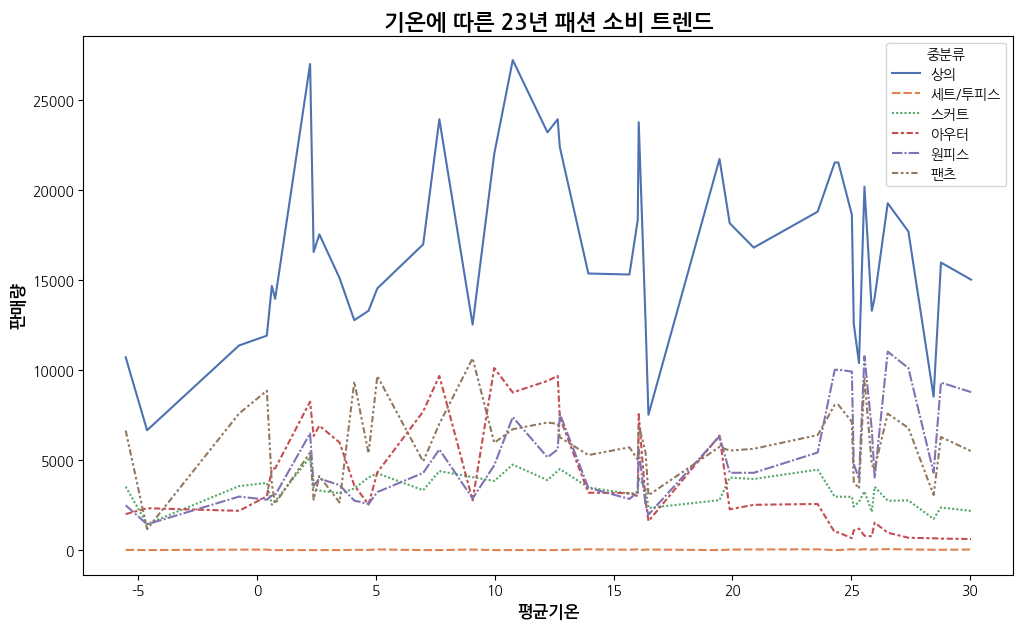

In [111]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = DF_23_temperature,
             palette = 'deep')
plt.title('기온에 따른 23년 패션 소비 트렌드', fontsize = 16, fontweight = 'bold')
plt.xlabel('평균기온', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량', fontsize = 12, fontweight = 'bold')
plt.legend(title = '중분류')
plt.show()

* 체감온도

In [104]:
DF_23_per_temperature = pd.pivot_table(DF_23_all,
                                   index = '체감온도',
                                   values = 'recent_sale_count',
                                   columns = 'category_middle_desc',
                                   aggfunc = 'sum',
                                   fill_value = 0)
DF_23_per_temperature

category_middle_desc,상의,세트/투피스,스커트,아우터,원피스,팬츠
체감온도,,,,,,
-5.51,10716,11,3524,2000,2489,6644
-4.89,6660,0,1444,2327,1433,1165
-1.19,11374,26,3556,2182,2972,7588
0.84,11919,27,3732,2986,2803,8863
1.36,28652,0,5233,9067,6084,6253
2.67,27020,0,5162,8250,6486,5426
2.83,16569,0,3418,6346,3584,2808
3.24,17552,0,3311,6918,3975,4114
4.02,15121,0,3156,5982,3612,2647


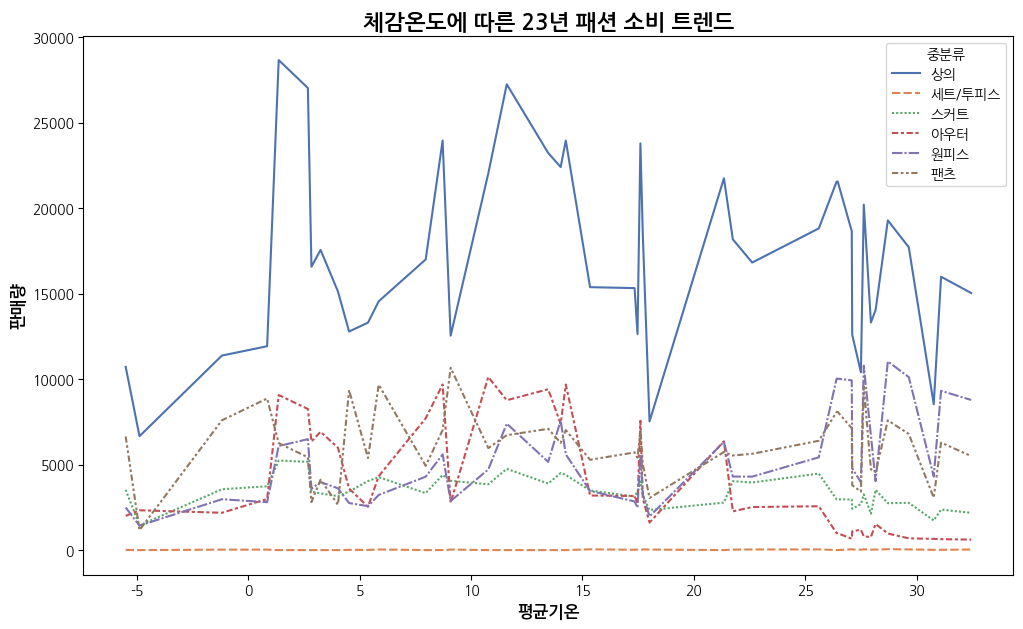

In [106]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = DF_23_per_temperature,
             palette = 'deep')
plt.title('체감온도에 따른 23년 패션 소비 트렌드', fontsize = 16, fontweight = 'bold')
plt.xlabel('평균기온', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량', fontsize = 12, fontweight = 'bold')
plt.legend(title = '중분류')
plt.show()

> ## 2) 2023년 월별 판매 데이터

In [114]:
DF_23_all['month'] = DF_23_all.index.month

In [155]:
DF_23_sell_per_month = pd.pivot_table(data = DF_23_all,
                                      index = 'category_middle_desc',
                                      columns = 'month',
                                      values = 'recent_sale_count',
                                      fill_value=0,
                                      aggfunc='sum')
DF_23_sell_per_month

month,1,2,3,4,5,6,7,8,9,10,11,12
category_middle_desc,,,,,,,,,,,,
상의,48367,63207,133912,49636,21740,62375,72532,59850,67826,56583,65173,34627
세트/투피스,0,0,0,0,0,51,154,137,135,134,117,67
스커트,9126,12598,23860,9255,2775,8676,11347,11143,15970,12186,18892,11132
아우터,15106,23784,54160,16138,6363,2937,2779,4325,8872,10960,16175,6945
원피스,10951,14223,30934,14970,6326,31077,40133,28521,18049,11505,13833,8332
팬츠,10259,12154,38980,12989,5738,23743,29758,20493,22113,19062,38677,24892


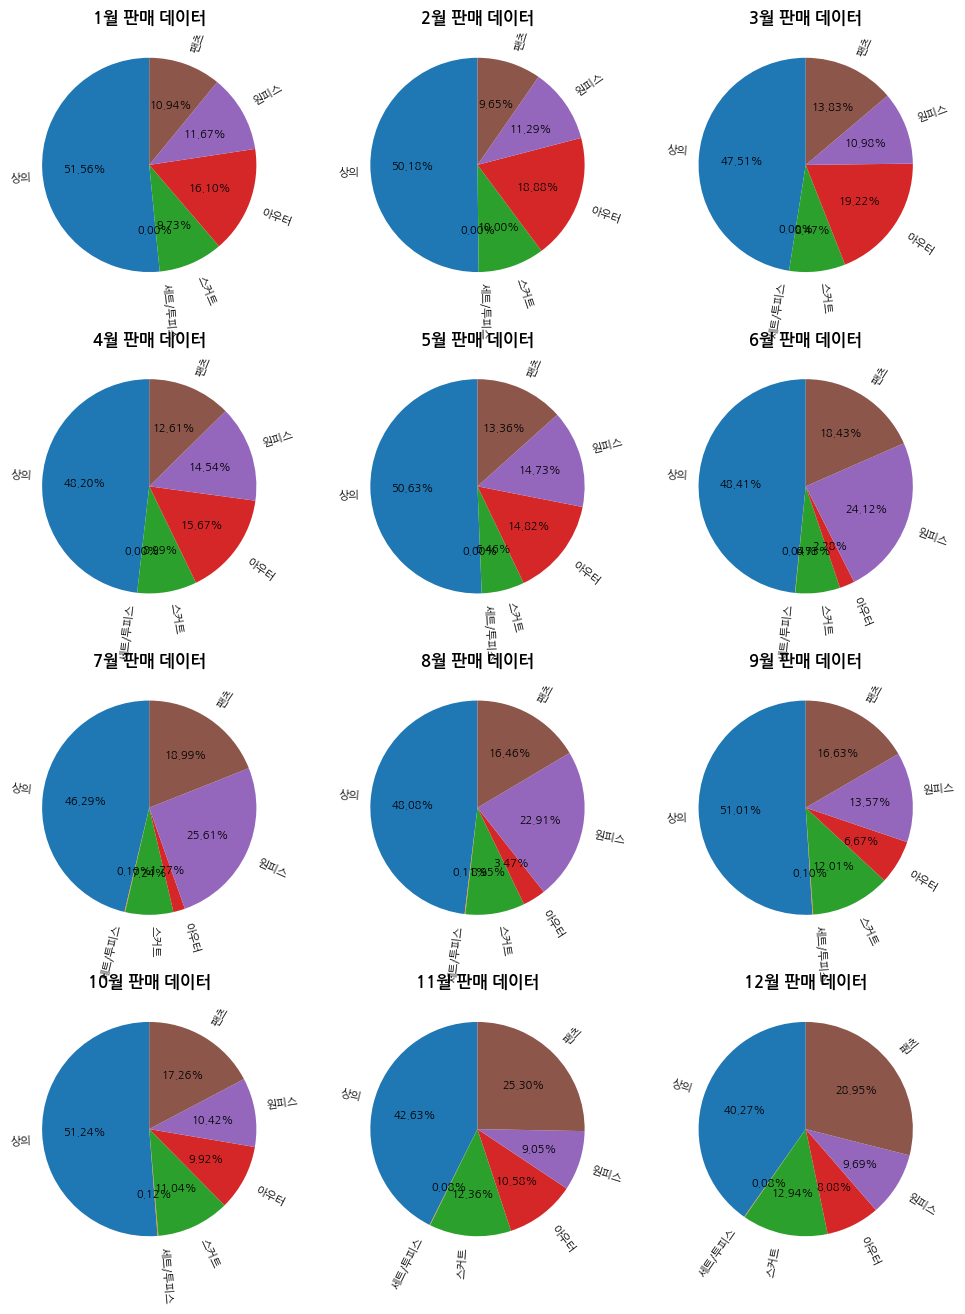

In [156]:
fig, axes = plt.subplots(nrows = 4, ncols=3, figsize = (12, 16))

subplot_index = [(i, j) for i in range(4) for j in range(3)]

for (row, col), month in zip(subplot_index, DF_23_sell_per_month.columns):
    ax = axes[row, col]
    ax.pie(DF_23_sell_per_month.loc[:, month],
           labels = DF_23_sell_per_month.index,
           autopct = '%.2f%%',
           textprops = {'fontsize':8},
           rotatelabels=True,
           startangle = 90)
    ax.set_title(str(month) + '월 판매 데이터', fontsize = 12, fontweight='bold')

plt.show()

# 24년 날씨-패션 탐색적 데이터 분석

> ## 1) 의류 별 판매량

In [ ]:
DF_24['month'] = DF_24.index.month

In [ ]:
fashion_sale_counts_24 = pd.pivot_table(DF_24,
                                        index = ['category_small_desc'],
                                        values = ['recent_sale_count'],
                                        columns = ['month'],
                                        aggfunc = 'sum',
                                        fill_value = 0)
fashion_sale_counts_24.sort_values(by=fashion_sale_counts_24.columns[0],
                                   ascending=False,
                                   inplace=True)
fashion_sale_counts_24

recent_sale_count       
month                              1      12
category_small_desc                         
티셔츠                             21087  22190
롱스커트                             7805   7669
롱원피스                             7589   6026
블라우스/셔츠                          6542   3771
조거팬츠                             4984   7415
니트                               4926   5303
면바지                              4829   6825
슬랙스                              4301   4895
뷔스티에/베스트                         3228   3363
점퍼                               3033   4394
재킷                               1979   1011
데님팬츠                             1666   1527
코듀로이팬츠                           1515   3287
플레어스커트                           1411   1769
H라인스커트                            887    878
반바지                               865    943
코트                                841    964
카디건                               786    576
니트원피스                             739    810
플리츠스커트                            651    631
미니원피스                             587    583
뷔스티에원피스                           253    284
트위드원피스                            246    318
점프슈트                              208    110
미니스커트                             102    110
세트/투피스                             86     67
머메이드스커트                            64     62
시폰원피스                              60     44
스퀘어넥원피스                            55     43
셔츠원피스                              44     30
플리츠원피스                             40     58
데님원피스                              25      4
데님스커트                              20     13
랩원피스                               19     15
리넨원피스                              12      7

<Figure size 2000x1000 with 0 Axes>

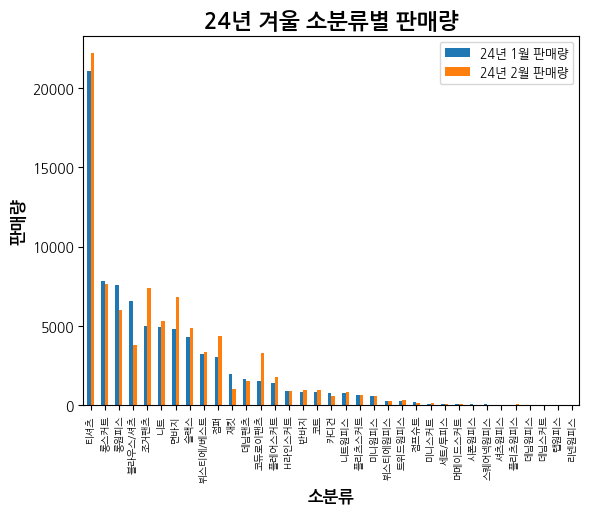

In [ ]:
plt.figure(figsize = (20, 10))
fashion_sale_counts_24.plot(kind='bar')
plt.title('24년 겨울 소분류별 판매량', fontsize = 16, fontweight='bold')
plt.xlabel('소분류', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량', fontsize = 12, fontweight = 'bold')
plt.legend(['24년 1월 판매량', '24년 2월 판매량'], fontsize = 9)
plt.xticks(fontsize=7)
plt.show()

> ## 2) 의류 별 키워드

In [ ]:
DF_24['item'] = DF_24['item'] + ','
DF_24['item'] = DF_24['item'] * DF_24['recent_sale_count']

item_24 = DF_24['item'].unique().tolist()
item_24 = str(item_24)

In [ ]:
item_24 = item_24.replace("'", ",").replace(" ", ",").replace("/", ",")
item_24 = re.sub("[\d\\-\.\[\](nan)]", "", item_24)
item_24 = re.sub(",{2,}", ",", item_24)

item_count_24 = pd.Series(item_24.split(',')).value_counts()
DF_24_item_count = pd.DataFrame(item_count_24)
DF_24_item_count

,0
기모팬츠,17450
와이드팬츠,13600
겨울팬츠,13212
맨투맨,12242
롱스커트,11397
...,...
캐주얼항공점퍼,1
디즈니트레이닝복,1
캐릭터잠옷,1
꼬임셔츠,1


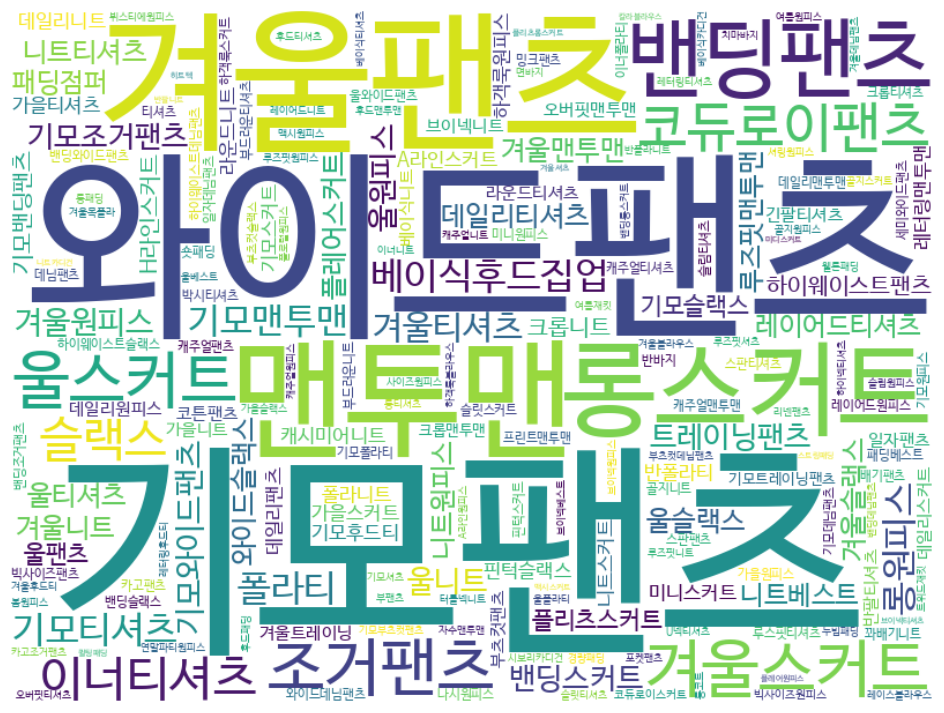

In [ ]:
from wordcloud import WordCloud

korean_font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wc = WordCloud(font_path = korean_font_path,
               background_color = 'white',
               width = 800,
               height = 600)

frequencies = DF_24_item_count[0]

wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize = (14, 9))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

> ## 3) 의류 색상 키워드

In [ ]:
DF_24['color'] = DF_24['color'] + ','
DF_24['color'] = DF_24['color'] * DF_24['recent_sale_count']

In [ ]:
color_24 = DF_24['color'].unique().tolist()

color_24 = str(color_24)

In [ ]:
color_24 = color_24.replace("'", ",").replace(" ", ",").replace("/", ",")
color_24 = re.sub("[\d\\-\.\[\](nan)]", "", color_24)
color_24 = re.sub(",{2,}", ",", color_24)

In [ ]:
color_count_24 = pd.Series(color_24.split(',')).value_counts()
DF_24_color_count = pd.DataFrame(color_count_24)
DF_24_color_count

,0
블랙,77194
아이보리,59845
베이지,49058
그레이,38128
핑크,35666
브라운,32225
차콜,28323
화이트,28029
라이트블루,20839
네이비,17345


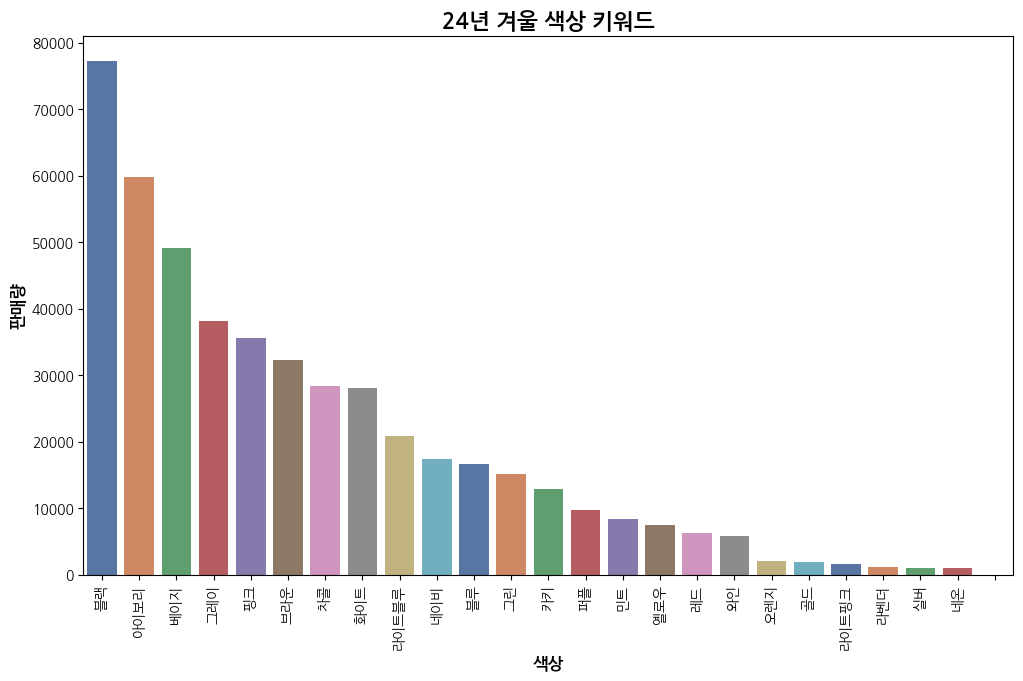

In [ ]:
plt.figure(figsize = (12, 7))
sns.barplot(data=DF_24_color_count,
            x = DF_24_color_count.index,
            y = DF_24_color_count[0],
            palette = 'deep')
plt.title('24년 겨울 색상 키워드', fontsize = 16, fontweight = 'bold')
plt.xlabel('색상', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

> ## 4) 의류 별 재질 키워드

In [ ]:
DF_24['material'] = DF_24['material'] + ','

DF_24['material'] = DF_24['material'] * DF_24['recent_sale_count']

In [ ]:
material_24 = DF_24['material'].unique().tolist()

material_24 = str(material_24)

In [ ]:
material_24 = material_24.replace("'", ",").replace(" ", ",").replace("/", ",")
material_24 = re.sub("[\d\\-\.\[\](nan)]", "", material_24)
material_24 = re.sub(",{2,}", ",", material_24)

In [ ]:
material_count_24 = pd.Series(material_24.split(',')).value_counts()
DF_24_material_count = pd.DataFrame(material_count_24)
DF_24_material_count

,0
폴리에스터,33639
스판,23145
코튼,18162
기모,11747
레이온,11370
울,9827
실크,9588
아크릴,7088
코듀로이,6546
나일론,4445


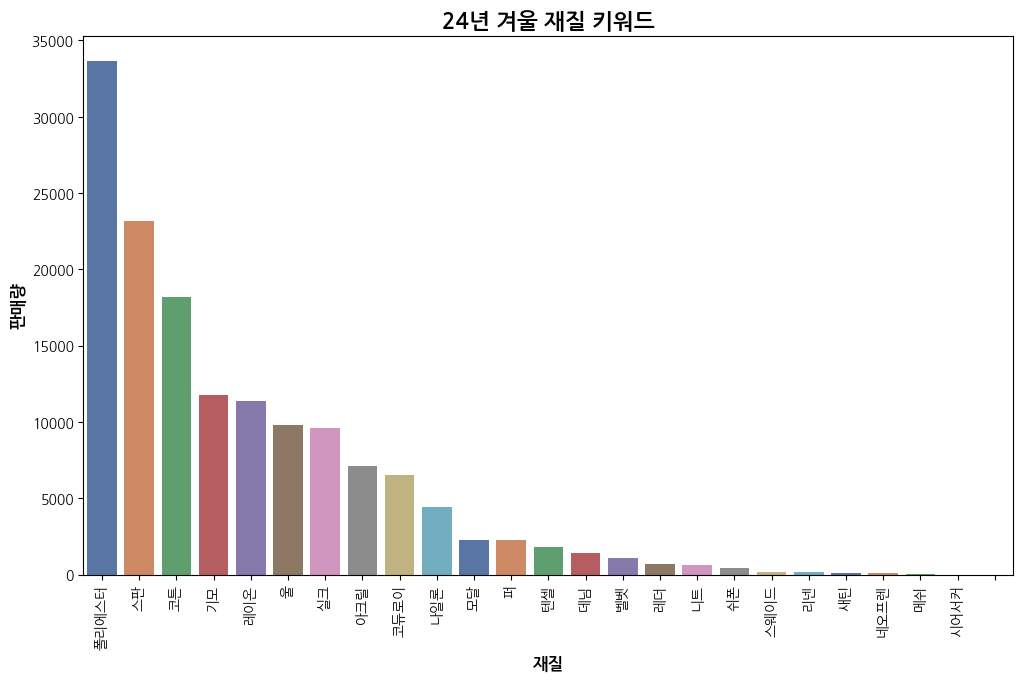

In [ ]:
plt.figure(figsize = (12, 7))
sns.barplot(data=DF_24_material_count,
            x = DF_24_material_count.index,
            y = DF_24_material_count[0],
            palette = 'deep')
plt.title('24년 겨울 재질 키워드', fontsize = 16, fontweight = 'bold')
plt.xlabel('재질', fontsize = 12, fontweight = 'bold')
plt.ylabel('판매량',fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()